In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## Regresja logistyczna 

[Play with Logistic Regression](https://playground.tensorflow.org/#activation=sigmoid&batchSize=21&dataset=gauss&regDataset=reg-plane&learningRate=0.00001&regularizationRate=0&noise=0&networkShape=1&seed=0.21479&showTestData=false&discretize=true&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### <span style="color:purple"> Model probabilistyczny </span>
Każdy przykład ze zbioru danych $x_i \in X$ ma przypisaną etykietę $y_i \in \{1, \ldots, K \}$.
 <span style="color:purple">Regresja logistyczna </span> jest jednym z klasycznych modeli, który bezpośrednio nadaje się zarówno do klasyfikacji binarnej (dwie klasy: $y_i \in \{0,1\}$), jak i wieloklasowej. 
Ten model jest o tyle ważny, że stanowi podstawę modeli klasyfikacyjnych opartych o sieci neuronowe. 

Regresja logistyczna tworzy model probabilistyczny określający prawdopodobieństwo przynależności punktu do poszczególnych klas. 
W tym modelu chcemy dla każdego punktu wyznaczyć tak zwany rozkład a posteriori $p(1|x_i),\ldots,p(K|x_i)$ określający przynależność punktu $x_i$ do każdej z $K$ klas. Jako finalną decyzję o klasyfikacji przyjmujemy tę najbardziej prawdopodobną, czyli:

$$
c(x) = \arg \max_{k \in \{1, \dots, K\}} p(k | x_i).
$$

Żeby zbudować taki model, musimy sparametryzować prawdopodobieństwa a posteriori, a następnie zbudować funkcję kosztu definiującą kryterium optymalizacyjne. W celu sparametryzowania $p(k|\cdot)$, określmy moc przyporządkowania punktu $x$ do klasy $k$, wykorzystując model liniowy postaci:

$$
f_k(x) = w_k^Tx+b_k \in \mathbb{R}, \quad \text{dla} \quad k \in \{1, \ldots, K\}.
$$

Mając $K$ takich modeli liniowych, możemy wskazać najbardziej prawdopodobną klasę poprzez wyznaczenie największej wartości $f_k(x)$ dla $k \in \{1, \ldots, K\}$.
W celu transformacji tcyh funkcji do prawdopodobieństw wykorzystamy funkcję <span style="color:purple"> softmax </span> postaci:

$$
p(k|x) = \frac{\exp(z_k)}{\sum_{j=1}^{K}\exp(z_j)} \in (0,1),
$$

gdzie $z_k = f_k(x) = w_k^T + b_k.$

W przypadku klasyfikacji binarnej (dwóch klas) musimy jedynie wyznaczyć jedynie $w_1,b_1$, ponieważ wartości  $w_2,b_2$ wyznaczamy korzystajac z definicji prawdopodobieństwa. W tej sytuacji prawdopodobienstwo a posteriori jest zadane za pomocą <span style="color:purple">funkcji sigmoidalnej: </span>
$$
p(1|x) = \frac{\exp(w^Tx+b)}{1+\exp(w^Tx+b)}.
$$

### Przykład 1: Implementacja funkcji sigmoidalnej oraz softmax i wykresy tych funkcji dla przykładowych danych

#### Główne właściwości funkcji sigmoidalnej:
- **Zakres wartości**: Funkcja sigmoidalna przekształca dowolną wartość $x$ (od $-\infty$ do $+\infty$) na wartość z zakresu $(0, 1)$. Jest to szczególnie użyteczne w zadaniach klasyfikacji binarnej, ponieważ wynik można zinterpretować jako prawdopodobieństwo.
  
- **Asymptoty**: Funkcja sigmoidalna asymptotycznie zbliża się do $0$ dla bardzo dużych ujemnych wartości $x$ i do $1$ dla bardzo dużych dodatnich wartości $x$.

- **Monotoniczność**: Funkcja jest monotoniczna rosnąca, co oznacza, że dla większych wartości $x$ jej wynik będzie zawsze większy.

#### Główne właściwości funkcji softmax:
- **Zakres wartości**: Każdy wynik funkcji softmax to prawdopodobieństwo, więc funkcja zwraca wartości z przedziału $(0, 1)$. Dodatkowo suma wszystkich prawdopodobieństw (dla wszystkich klas) wynosi 1.
  
- **Skalowanie**: Wyniki funkcji softmax zależą od relacji między wartościami w wektorze wejściowym. Jeśli jedna wartość w wektorze jest wyraźnie większa od innych, wynik tej klasy będzie bliski 1, a pozostałe wartości bliskie 0.

- **Porównanie z funkcją sigmoidalną**: W przypadku klasyfikacji binarnej można użyć funkcji sigmoidalnej, ale w przypadku klasyfikacji wieloklasowej lepsza jest funkcja softmax, ponieważ zapewnia rozdzielenie prawdopodobieństw pomiędzy wszystkie klasy.

#### Pytania:
1. **Co się stanie z wynikiem funkcji sigmoidalnej, gdy $x \to +\infty$ lub $x \to -\infty$?**

2. **W jakich przypadkach lepiej użyć funkcji sigmoidalnej, a w jakich funkcji softmax?**


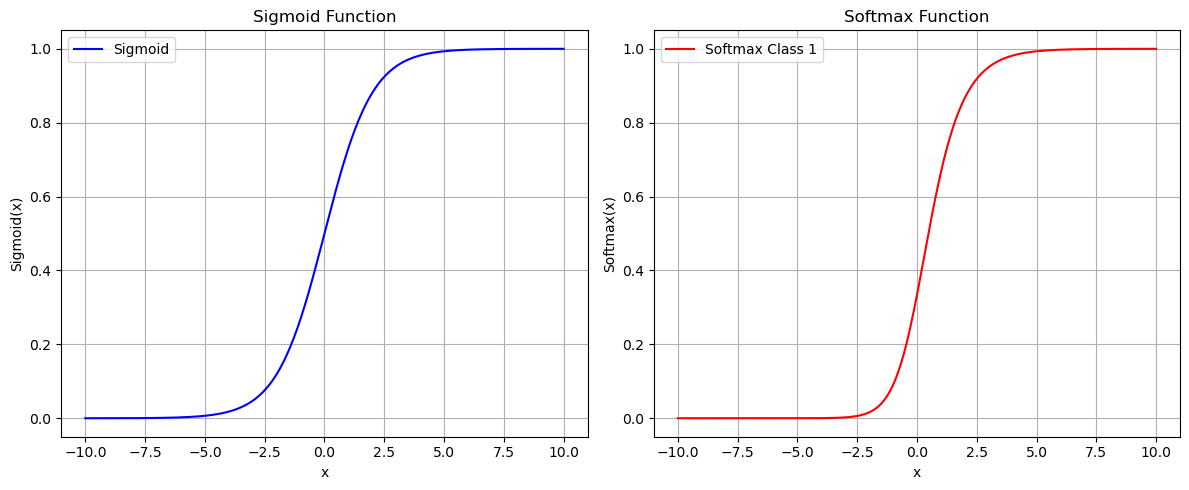

In [ ]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Softmax function (applied to a vector)
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting max for numerical stability
    return e_x / e_x.sum(axis=0)

# Data for plotting
x = np.linspace(-10, 10, 400)  # Range of x for sigmoid
y_sigmoid = sigmoid(x)  # Sigmoid output for each x

# Softmax data (vector of 3 values for comparison)
x_softmax_input = np.array([x, np.zeros_like(x), -x])  # Creating 3 input arrays for softmax

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot sigmoid function
ax1.plot(x, y_sigmoid, label='Sigmoid', color='blue')
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('x')
ax1.set_ylabel('Sigmoid(x)')
ax1.grid(True)
ax1.legend()

# Plot softmax function
y_softmax = softmax(x_softmax_input)
ax2.plot(x, y_softmax[0], label='Softmax Class 1', color='red')
ax2.set_title('Softmax Function')
ax2.set_xlabel('x')
ax2.set_ylabel('Softmax(x)')
ax2.grid(True)
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


### <span style="color:purple"> Funkcja kosztu </span>

Estymacja modelu regresji logistycznej polega na znalezieniu parametrów $w_k, b_k$ dla wszytskich klas. Standardowa metoda polega na maksymalizacji funkcji wiarygodności $\prod_{i=1}^N p(y_i|x_i)$. Biorąc logarytm (z minusem) otrzymujemy problem minimalizacji:

$$
\text{LR}_{w,b}(X,Y) = -\log(X,Y) = - \frac{1}{N} \sum_{i=1}^N \log p (y_i|x_i),
$$

gdzie $w= (w_1, \ldots, w_K)$, $b = (b_1, \ldots, b_K)$. W terminologii sieci neuronowych powyższą funkcję nazywa się często <span style="color:purple">entropią krzyżową (z ang. cross-entropy) </span>. Entropia krzyżowa w połączeniu z funkcją softmax stanowi podstawową funkcję kosztu stosowaną w klasyfikacyjnych sieciach neuronowych. 

### Przykład obliczania funkcji kosztu w regresji logistycznej

Załóżmy, że mamy jedną próbkę $x_1$ z etykietą $y_1 = 1$, a model przewiduje $\hat{p}(y_1 = 1 | x_1) = 0.8$. Wtedy:

1. **Obliczenie prawdopodobieństwa**:
   - Ponieważ $y_1 = 1$, obliczamy $p(y_1 = 1 | x_1) = 0.8$.

2. **Logarytm prawdopodobieństwa**:
   - $\log p(y_1 = 1 | x_1) = \log(0.8)$.

3. **Funkcja kosztu dla tej próbki**:
   - Funkcja kosztu wyniesie:  
   $$
   - \log(0.8) \approx 0.223
   $$

Jeśli etykieta $y_1$ byłaby 0, a model przewidywał $\hat{p}(y_1 = 1 | x_1) = 0.8$, wtedy:

1. **Obliczenie prawdopodobieństwa**:
   - Ponieważ $y_1 = 0$, obliczamy $p(y_1 = 0 | x_1) = 1 - 0.8 = 0.2$.

2. **Logarytm prawdopodobieństwa**:
   - $\log p(y_1 = 0 | x_1) = \log(0.2)$.

3. **Funkcja kosztu dla tej próbki**:
   - Funkcja kosztu wyniesie:  
   $$
   - \log(0.2) \approx 1.609
   $$

### Podsumowanie:

Funkcja kosztu oblicza, jak dobrze model przewiduje prawdziwe etykiety. Im większa wartość prawdopodobieństwa, tym mniejsza wartość funkcji kosztu, a im bardziej model się myli, tym wyższa wartość funkcji kosztu.


### Przykład 2.

Implementacja regresji logistycznej w PyTorchu.
1. Funkcja kosztu modelu regresji logistycznej `loss(X, y)`, zaimplementowana według następujących kroków:
    * Obliczenie modelu liniowego $z = w^Tx + b$
    * Na wektorze $z$ implementacja funkcji $\hat{y} = \sigma(z) = \frac{1}{1 + \exp(-z)}$.
    * Obliczenie entropii krzyżowej pomiędzy predykcjami $\hat{y}$ a etykietami $y$ zadaną przez:
    $\frac{1}{N} \sum_i - (1 - y_i) \ln (1 - \hat{y}_i) - y_i \ln \hat{y}_i$
2. Funkcja `predict_proba(X)` zwracającą dla każdego $x_i \in X$ zadane przez nasz model prawdopodobieństwo $\hat{p}(y = 1 \mid x_i)$. 
3. Funkcja `predict(X)` zwracającą dla każdego $x_i \in X$ przewidywaną etykietę (tzn. $0$ albo $1$).

**UWAGA** Nie korzystamy tutaj z funkcji PyTorcha do liczenia entropii krzyżowej (np. `torch.nn.BCELoss`) ani sigmoidy (np.`torch.nn.functional.Sigmoid`).

In [16]:
import sys
from collections import namedtuple

if sys.version_info[0] < 3:
    raise Exception("Must be using Python 3")
elif sys.version_info[1] < 7:
    Dataset = namedtuple(
        "Dataset",
        ["data", "target", "target_names", "filename"],
    )
    Dataset.__new__.__defaults__ = (None,) * len(Dataset._fields)
else:
    Dataset = namedtuple(
        "Dataset", ["data", "target", "target_names", "filename"], defaults=(None, None, None, None)
    )

def get_classification_dataset_1d() -> Dataset:
    torch.manual_seed(8)
    X = torch.cat(
        [
            torch.randn(10, 1) * 3 + 10,
            torch.randn(10, 1) * 3 + 1,
        ]
    )

    y = torch.cat([torch.zeros(10), torch.ones(10)])
    return Dataset(X, y)


def get_classification_dataset_2d() -> Dataset:
    torch.manual_seed(4)
    X = torch.cat(
        [
            torch.randn(50, 2) * 2 + torch.tensor([4.0, 2.0]),
            torch.randn(50, 2) * 0.5 + torch.tensor([2.0, -4.0]),
        ]
    )

    y = torch.cat([torch.zeros(50), torch.ones(50)])
    return Dataset(X, y)

In [17]:
# Przygotujmy datasety i funkcje pomocnicze
dataset_1d = get_classification_dataset_1d()
dataset_2d = get_classification_dataset_2d()


def calculate_accuracy(
    logistic_reg: "LogisticRegression", X: torch.Tensor, y: torch.Tensor
) -> float:
    preds = logistic_reg.predict(X)
    correct_n = (preds == y).float().sum().item()
    return float(correct_n / len(y))


def plot_dataset_1d(logistic_reg: "LogisticRegression", dataset_1d: Dataset) -> None:
    plt.scatter(dataset_1d.data[:10], [0.5] * 10, c="purple", label="0")
    plt.scatter(dataset_1d.data[10:], [0.5] * 10, c="yellow", label="1")
    linspace = torch.linspace(-7.5, 15, steps=100).view(-1, 1)
    plt.plot(
        linspace.numpy().ravel(),
        logistic_reg.predict_proba(linspace).detach().numpy(),
        label="p(y=1 | x)",
    )
    plt.legend()
    plt.show()


def plot_dataset_2d(logistic_reg: "LogisticRegression", dataset_2d: Dataset) -> None:
    plt.scatter(dataset_2d.data[:50, 0], dataset_2d.data[:50, 1], c="purple", label="0")
    plt.scatter(dataset_2d.data[50:, 0], dataset_2d.data[50:, 1], c="yellow", label="1")

    linspace_x = torch.linspace(-4, 7, steps=100)
    linspace_y = (-logistic_reg.bias - logistic_reg.weight[0] * linspace_x) / logistic_reg.weight[1]

    linspace_y = linspace_y.detach().numpy()
    plt.plot(linspace_x.detach().numpy(), linspace_y, label="Granica decyzyjna")
    plt.legend()

In [14]:
class LogisticRegression:
    def __init__(self, input_dim: int) -> None:
        self.input_dim = input_dim
        self.weight = torch.randn(self.input_dim, requires_grad=True)
        self.bias = torch.randn((), requires_grad=True)

    def _sigmoid(self, x: torch.Tensor) -> torch.Tensor:
        return 1 / (1 + torch.exp(-x))

    def fit(
        self, X: torch.Tensor, y: torch.Tensor, lr: float = 1e-6, num_steps: int = int(1e4)
    ) -> None:
        self.weight = torch.randn(self.input_dim, requires_grad=True)
        self.bias = torch.randn((), requires_grad=True)
        for idx in range(num_steps):
            self.weight.requires_grad = True
            self.bias.requires_grad = True

            loss_val = self.loss(X, y)
            loss_val.backward()

            w_grad = self.weight.grad
            b_grad = self.bias.grad
            with torch.no_grad():
                self.weight = self.weight - lr * w_grad
                self.bias = self.bias - lr * b_grad

    @torch.no_grad()
    def predict_proba(self, X: torch.Tensor) -> torch.Tensor:
        return 1 / (1 + torch.exp( -(X @ self.weight + self.bias)))

    def predict(self, X: torch.Tensor) -> torch.FloatTensor:
        return ((self._sigmoid(X @ self.weight + self.bias))>=0.5).float()

    def loss(self, X: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        y_hat = self._sigmoid(X @ self.weight + self.bias)
        return(-(1 - y) * torch.log(1 - y_hat) - y * torch.log(y_hat)).mean()

Accuracy 0.9


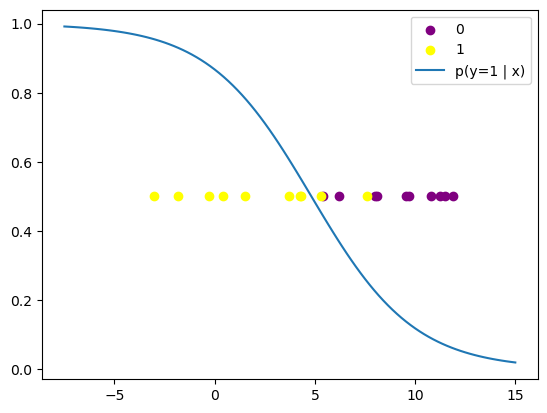

In [18]:
logistic_reg = LogisticRegression(1)
logistic_reg.fit(dataset_1d.data, dataset_1d.target, lr=1e-3, num_steps=int(2e4))
acc = calculate_accuracy(logistic_reg, dataset_1d.data, dataset_1d.target)
print("Accuracy", acc)

plot_dataset_1d(logistic_reg, dataset_1d)

Accuracy 0.99


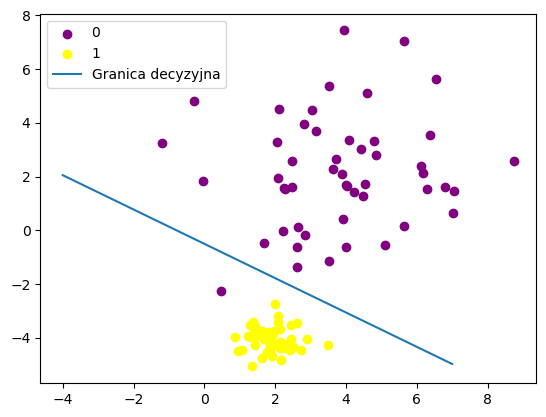

In [19]:
logistic_reg = LogisticRegression(2)
logistic_reg.fit(dataset_2d.data, dataset_2d.target, lr=1e-2, num_steps=int(2e4))
acc = calculate_accuracy(logistic_reg, dataset_2d.data, dataset_2d.target)
print("Accuracy", acc)

plot_dataset_2d(logistic_reg, dataset_2d)

### <span style="color:purple"> Minimalizacja gradientowa - gradient descent </span>
Minimalizacja gradientowa <span style="color:purple">(ang. Gradient Descent, DG)</span> to jedna z najczęściej używanych technik optymalizacji, która polega na iteracyjnym poszukiwaniu minimum funkcji kosztu (straty). Metoda ta jest fundamentalna w kontekście uczenia maszynowego i głębokiego uczenia, szczególnie w kontekście algorytmów takich jak regresja logistyczna czy sieci neuronowe. 

Celem minimalizacji gradientowej jest znalezienie takich wartości parametrów (wag), które minimalizują funkcję kosztu, czyli błędy predykcji modelu w stosunku do rzeczywistych danych. Działanie tej metody polega na obliczeniu gradientu funkcji kosztu względem wag modelu, a następnie „kroczymy” w kierunku przeciwnym do gradientu, aby zmniejszyć wartość funkcji kosztu. 

<span style="color:purple">Kroki algorytmu minimalizacji gradientowej</span>.

1. **Inicjalizacja wag**:  
   Wagi (parametry modelu) są inicjowane losowo.

2. **Obliczenie gradientu**:  
   Dla bieżących wag, obliczamy gradient funkcji kosztu, czyli zestawienie wszystkich jej pochodnych cząstkowych. Gradient to wektor, który wskazuje kierunek, w którym funkcja kosztu rośnie najszybciej.

3. **Aktualizacja wag**:  
   Wagi są aktualizowane poprzez „krok” w kierunku przeciwnym do gradientu:
   
   $$
   w_{\text{new}} = w_{\text{old}} - \eta \cdot \nabla J(w)
   $$
   
   gdzie:
   - $ w_{\text{new}} $ to nowe wagi,
   - $ w_{\text{old}} $ to obecne wagi,
   - $ \eta $ to współczynnik uczenia (learning rate),
   - $\nabla J(w)$ to gradient funkcji kosztu $ J $ względem wag $ w $.

4. **Powtarzanie**:  
   Proces ten jest powtarzany przez określoną liczbę iteracji lub do momentu, gdy zmiany wag staną się minimalne.


### <span style="color:purple">Uwaga</span>
Wybór punktu startowego oraz współczynnika uczenia (learning rate) ma znaczenie dla działania algorytmu. 

### Przykład 3.

Uzupełnij implementację algorytmu minimalizacji gradientowej oraz sprawdź, jak różne wartości współczynnika uczenia wpływają na działanie algorytmu.
Twoim celem jest zminimalizowanie funkcji $f(x) = x^2 $ za pomocą algorytmu gradient descent.

W tym celu należy wykonać następujące kroki:

1. Napisać funkcję $ f(x) = x^2 $, która będzie reprezentować nasz obiekt do minimalizacji.
2. Obliczyć pochodną tej funkcji.
3. Uzupełnić implemnetację algorytmu gradient descent (tylko krok w którym aktualizujemy wagi)


Po zaimplementowaniu algorytmu, spróbuj różnych wartości $lr$ (np. 0.01, 0.1, 0.5, 0.9, 1) i sprawdź, jak zmienia się trajektoria i szybkość zbieności algorytmu.

Jak współczynnik uczenia wpływa na wynik końcowy?



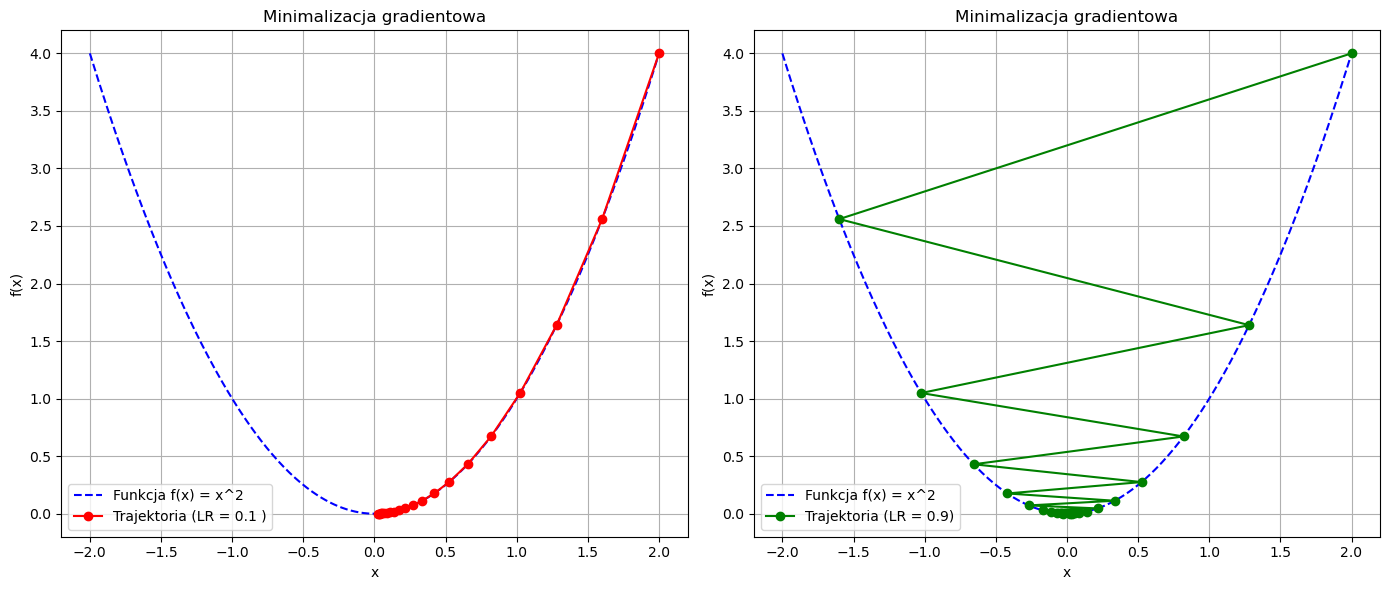

In [ ]:
# Funkcja, którą chcemy minimalizować za pomocą GD
def f(x):
    ...

# Pochodna tej funkcji
def df(x):
    ...

# Implementacja algorytmu minimalizacji gradientowej
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    trajectory = [x]
    for _ in range(iterations):
        ...



x_vals = np.linspace(-2, 2, 400)
y_vals = f(x_vals)

# Parametry minimalizacji gradientowej
iterations = 20
starting_point = 2  

# Różne wartości współczynnika uczenia
learning_rate_small = 0.1  
learning_rate_large = 0.9  

# Obliczanie trajektorii dla obu wartości LR
trajectory_small = gradient_descent(starting_point, learning_rate_small, iterations)
trajectory_large = gradient_descent(starting_point, learning_rate_large, iterations)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(x_vals, y_vals, label="Funkcja f(x) = x^2", color="blue", linestyle="--")
axs[0].plot(trajectory_small, f(np.array(trajectory_small)), label=f"Trajektoria (LR = {learning_rate_small} )", color="red", marker='o')
axs[0].set_title("Minimalizacja gradientowa")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(x_vals, y_vals, label="Funkcja f(x) = x^2", color="blue", linestyle="--")
axs[1].plot(trajectory_large, f(np.array(trajectory_large)), label=f"Trajektoria (LR = {learning_rate_large})", color="green", marker='o')
axs[1].set_title("Minimalizacja gradientowa")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


### Zadanie 4.

Wykorzystując zaimplementowany algorytm minimalizacji gradientowej z poprzedniego zadania sprawdź, jak wybór punktu początkowego wpływa na działanie algorytmu.
Twoim celem jest zminimalizowanie funkcji $f(x) = x^4 - 4 \cdot x^3 + 3 \cdot x^2 $ za pomocą algorytmu gradient descent.

W tym celu należy wykonać następujące kroki:

1. Napisać funkcję $ f(x) = x^4 - 4 \cdot x^3 + 3 \cdot x^2 $, która będzie reprezentować nasz obiekt do minimalizacji.
2. Obliczyć pochodną tej funkcji.
3. Wykonać algorytm gradient descent zaimplementowany w poprzednim zadaniu.
4. Spróbuj różnych wartości punktu początkowego i sprawdź, jak zmienia się zbieżność algorytmu.

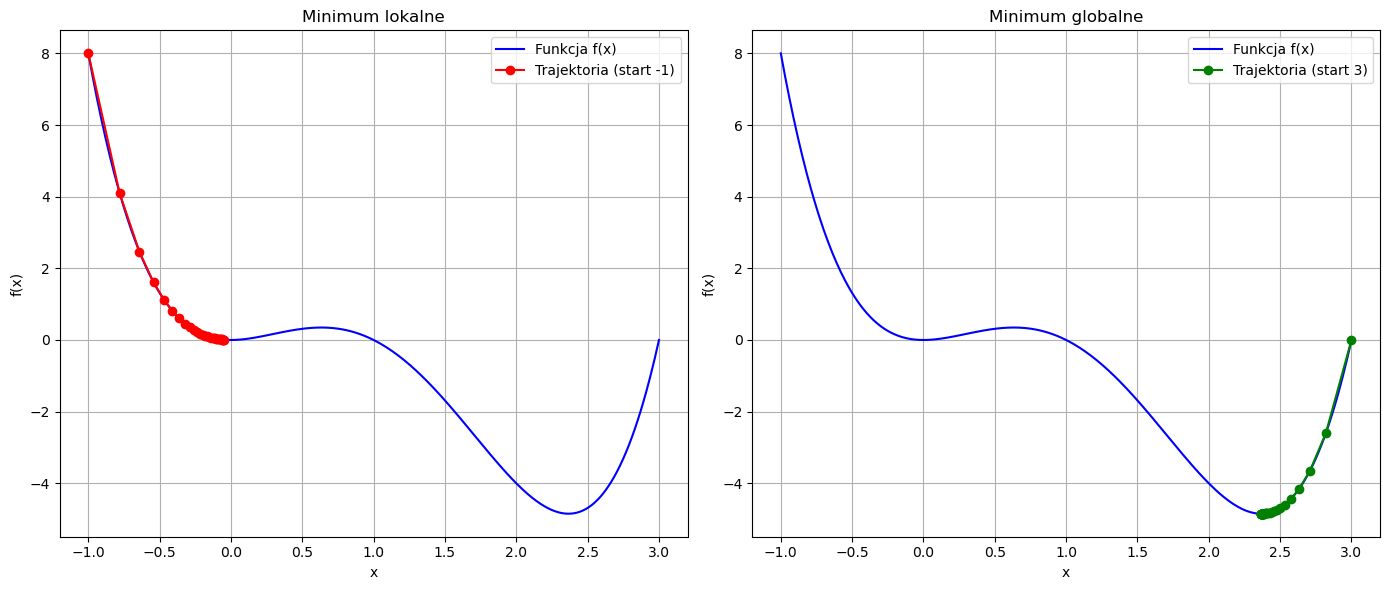

In [ ]:
# Funkcja, którą chcemy minimalizować za pomocą GD
def f(x):
    ...

# Pochodna tej funkcji
def df(x):
    ...

x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)

# Parametry minimalizacji gradientowej
learning_rate = 0.01
iterations = 30

# Punkty startowe dla dwóch różnych trajektorii
starting_point_1 = -1  
starting_point_2 = 3  

# Obliczanie trajektorii dla obu punktów startowych
trajectory_1 = gradient_descent(starting_point_1, learning_rate, iterations)
trajectory_2 = gradient_descent(starting_point_2, learning_rate, iterations)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].plot(x_vals, y_vals, label="Funkcja f(x)", color="blue")
axs[0].plot(trajectory_1, f(np.array(trajectory_1)), label=f"Trajektoria (start {starting_point_1})", color="red", marker='o')
axs[0].set_title("Minimum lokalne")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(x_vals, y_vals, label="Funkcja f(x)", color="blue")
axs[1].plot(trajectory_2, f(np.array(trajectory_2)), label=f"Trajektoria (start {starting_point_2})", color="green", marker='o')
axs[1].set_title("Minimum globalne")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


### Przykład 5.
Implementacja modelu regresji logistycznej z wykorzystaniem biblioteki sklearn i wizualizacja granicy decyzyjnej w przestrzeni cech dla danych dwuwymiarowych.

Sprawdź, jak zmienia się granica decyzyjna w zależności od różnych parametrów modelu (np. dodania regularizacji lub zmiany rozkładu danych).
Podpowiedź:
Do wizualizacji granicy decyzyjnej możesz użyć siatki punktów w przestrzeni cech:
- wygeneruj siatkę za pomocą np.meshgrid,
- dla każdego punktu na siatce oblicz przewidywane prawdopodobieństwo $p(y=1∣x)$,
- narysuj linię odpowiadającą $p(y=1∣x)=0.5.$

In [21]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

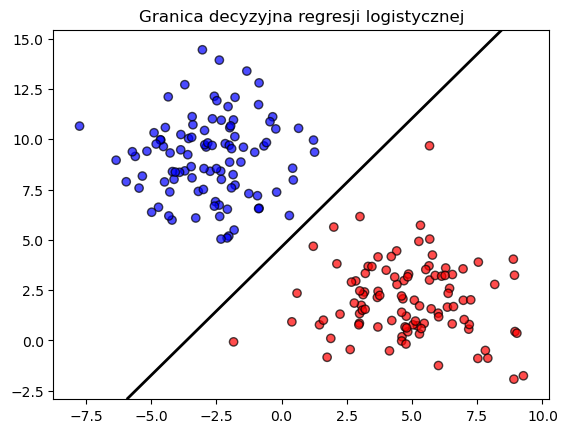

In [23]:
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.0)

model = LogisticRegression()
model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)  # Granica decyzyjna
plt.title("Granica decyzyjna regresji logistycznej")
plt.show()



In [24]:
# 1. Dane z różnym odchyleniem standardowym
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=4.0)  # Większy rozrzut
X2, y2 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=0.5)  # Mniejszy rozrzut

...

Ellipsis

In [25]:
# 2. Dodanie nieliniowych cech
X_nl = np.c_[X1, X1[:, 0] ** 2, X1[:, 0] * X1[:, 1]]  # Dodanie cechy x^2 i xy

...

Ellipsis